In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from math import floor, ceil, sqrt
import pandas as pd

#4.1 Fourier Transform

- low-pass filters: a mean (‘average’) filter and a binomial filter that smooth the image.
Compared to the simple averaging image, edge enhancement with the binomial filter is
notably smoother;
- high-pass filters: a contrast enhancement filter, oriented derivative filters (horizontal
Sobel, oblique gradient) and a non-oriented derivative filter (Laplacian).

## 4.1.1 For each filter given below, 


*   compute its Fourier transform
*   illustrate its magnitude response
*   Determine its function (smoothing, edge enhancement or edge detection) based on the filter coefficients & its frequency response
*   For each filter, determine whether it is separable?
*   if YES, compute the FT separately and explain the function of each 1D filte
*   if NO, compute the FT directly. (Test on grayscale Lena Image)







In [ ]:
f1 = np.array(([[1, 2, 1], [2, 4, 2], [1, 2, 1]]))/16

In [ ]:
f11 = np.array([[1,2,1]])
f11.shape

(1, 3)

In [ ]:
f12 = f11.T
f12.shape

(3, 1)

In [ ]:
f2 = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])

In [ ]:
f3 = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

In [ ]:
f31 = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])

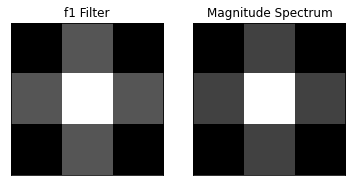

In [ ]:
fft_f1 = np.fft.fft2(f1)

fft_shift_f1 = np.fft.fftshift(fft_f1)

mag_spectrum_f1 = np.log(np.abs(fft_shift_f1)+1)

plt.subplot(1,2,1),plt.imshow(f1,cmap = 'gray')
plt.title('f1 Filter'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(mag_spectrum_f1,cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

FUNCTION: smoothing
low pass filtering

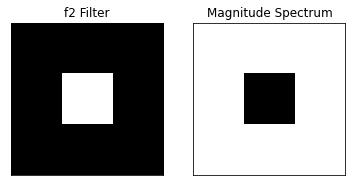

In [ ]:
fft_f2 = np.fft.fft2(f2)

fft_shift_f2 = np.fft.fftshift(fft_f2)

mag_spectrum_f2 = np.log(np.abs(fft_shift_f2)+1)

plt.subplot(1,2,1),plt.imshow(f2,cmap = 'gray')
plt.title('f2 Filter'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(mag_spectrum_f2,cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

FUNCTION: edge detection

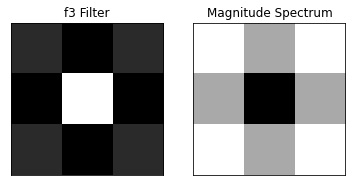

In [ ]:
fft_f3 = np.fft.fft2(f3)

fft_shift_f3 = np.fft.fftshift(fft_f3)

mag_spectrum_f3 = np.log(np.abs(fft_shift_f3)+1)

plt.subplot(1,2,1),plt.imshow(f3,cmap = 'gray')
plt.title('f3 Filter'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(mag_spectrum_f3,cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

FUNCTION: edge enhancement
Contrast enhancement filtering
We wish to enhance the contrast of object edges in the delimited area. We use thus an “enhancement” filter which has the following convolution kernel:

In [ ]:
lena = cv2.imread('/content/sample_data/Lena.bmp', cv2.IMREAD_GRAYSCALE)

In [ ]:
def pad(f,p,q):
  m,n = f.shape
  fp = np.zeros((p,q))
  fp[0:m,0:n]=f
  return fp

In [ ]:
def DFT(f, h):
  m,n = f.shape
  p=2*m
  q=2*n

  plt.imshow(f, "gray"), plt.title("f")
  plt.show()  
  fp = pad(f,p,q)
  plt.imshow(fp, "gray"), plt.title("padded f")
  plt.show()  
  F = np.fft.fftshift(np.fft.fft2(fp))
  plt.imshow(np.log(1+np.abs(F)), "gray"), plt.title("Magnitude Spectrum of F") 
  plt.show()
  hp= pad(h,p,q)
  H = np.fft.fftshift(np.fft.fft2(hp))
  plt.imshow(np.log(1+np.abs(H)), "gray"), plt.title("Magnitude Spectrum of H")
  plt.show()

  return F, H

In [ ]:
def apply_filter(F,H):
  G = F*H
  plt.imshow(np.log(1+np.abs(G)), "gray"), plt.title("Magnitude Spectrum of  G = F*H")  
  plt.show()
  Gp = np.fft.ifftshift(G)
  plt.imshow(np.log(1+np.abs(Gp)), "gray"), plt.title("Decentralized IFFT")
  plt.show()
  g = np.fft.ifft2(Gp)
  plt.imshow(np.abs(g[0:512 , 0:512]), "gray"), plt.title("Reversed Image") 
  plt.show()

  return g

### f1

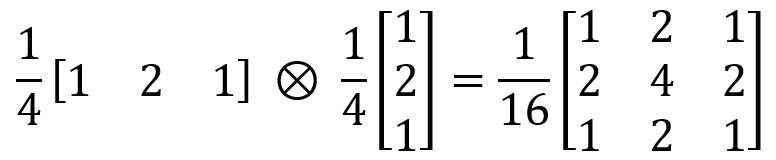

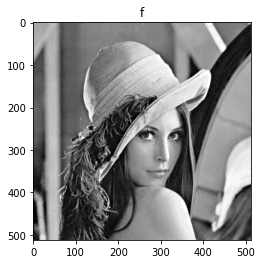

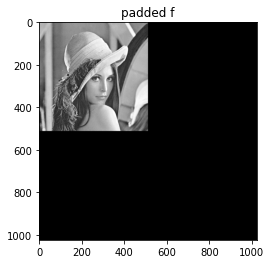

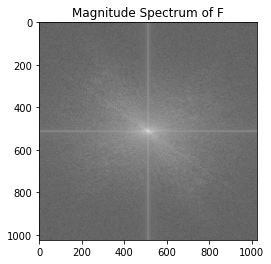

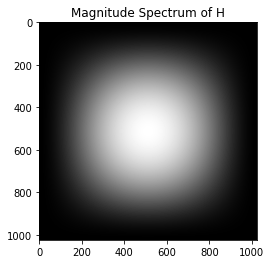

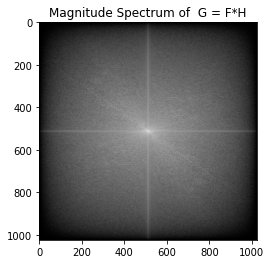

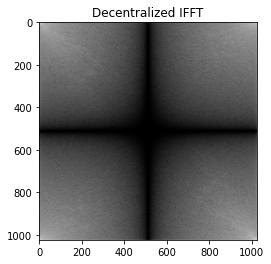

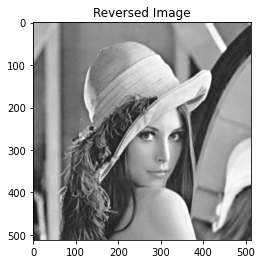

In [ ]:
F1, H1 = DFT(lena, f1)
g1 = apply_filter(F1,H1)

this filter smoothes vertical edges

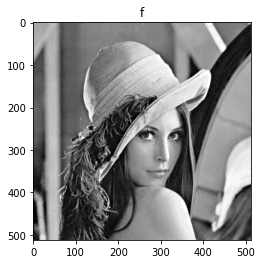

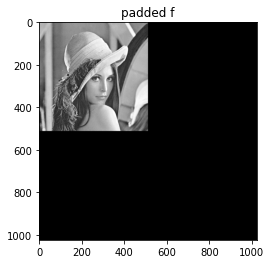

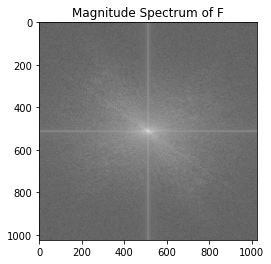

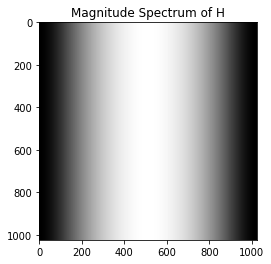

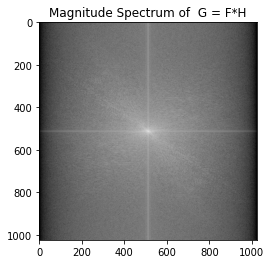

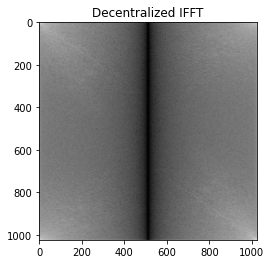

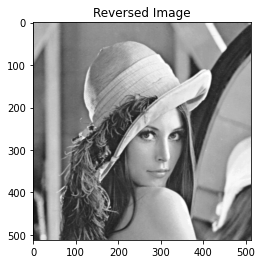

In [ ]:
F11, H11 = DFT(lena, f11)
g11 = apply_filter(F11,H11) 

this filter smoothes horizontal edges

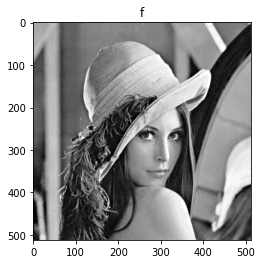

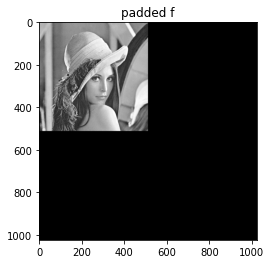

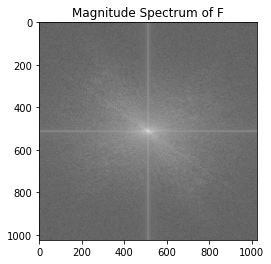

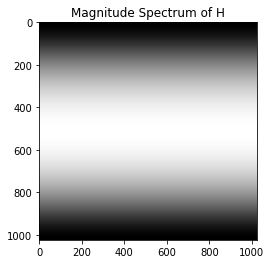

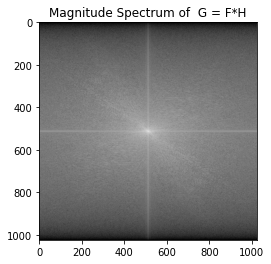

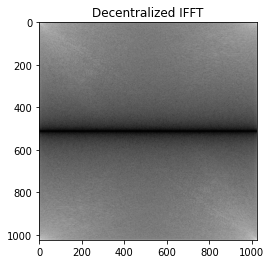

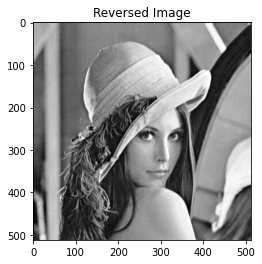

In [ ]:
F12, H12 = DFT(lena, f12)
g12 = apply_filter(F12,H12)

### f2

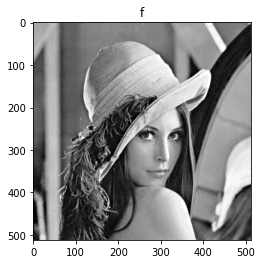

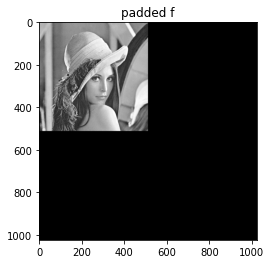

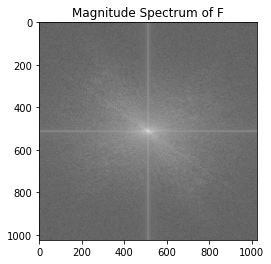

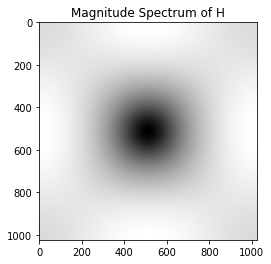

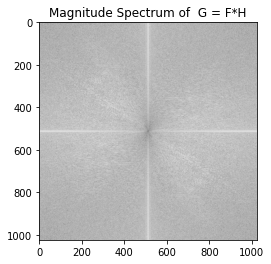

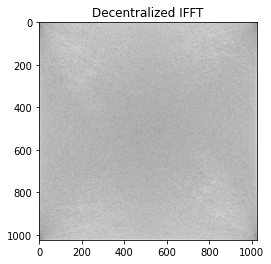

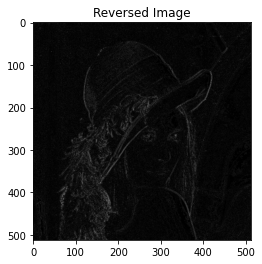

In [ ]:
F2, H2 = DFT(lena, f2)
g2 = apply_filter(F2,H2)

### f3

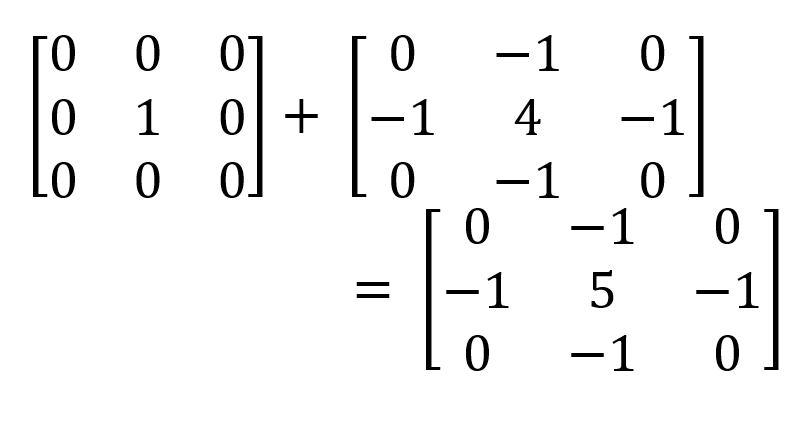

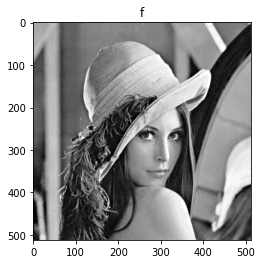

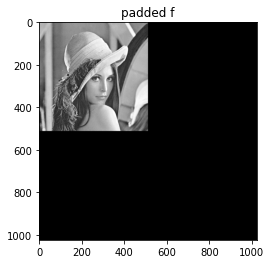

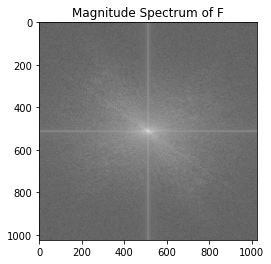

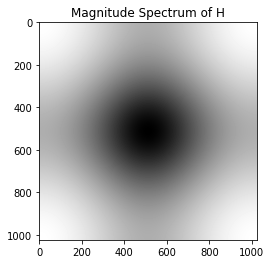

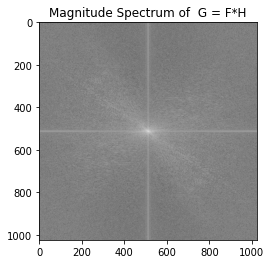

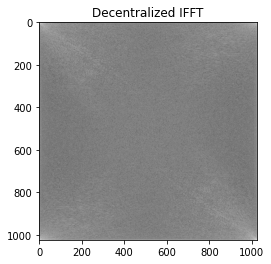

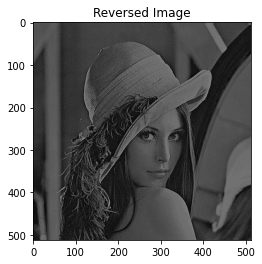

In [ ]:
F3, H3 = DFT(lena, f3)
g3 = apply_filter(F3,H3)

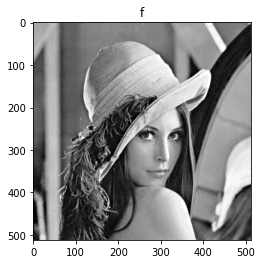

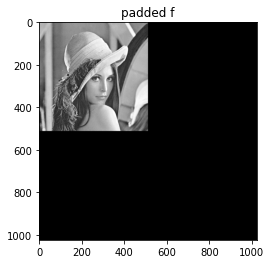

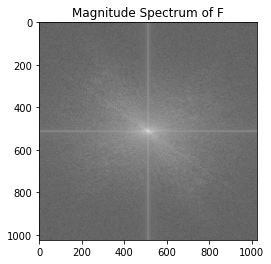

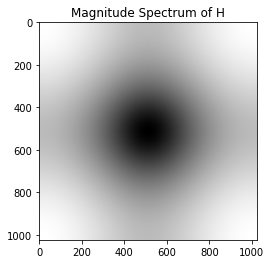

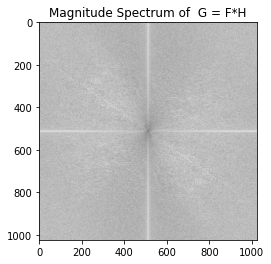

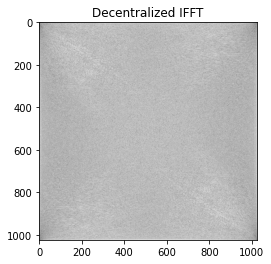

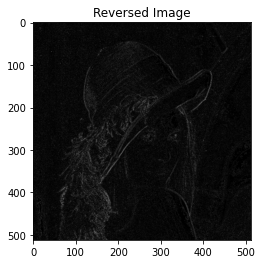

In [ ]:
F31, H31 = DFT(lena, f31)
g31 = apply_filter(F31,H31)

## 4.1.2
Display the magnitude of the DFT image
with and without shifting and with and without logarithmic.

در حوزه فرکانس مرکز فرکانس تبدیل به مبدا مختصات میشود. (0و0) فرکانس که پر از اطلاعات است ئر (0و0)  تصویر می نشیند و خوب دیده نمیشود. پس مرکز فرکانسی باید بخ مرکز تصویر شیفت پیدا کند. برای بهتر دیدن سیگنال ها.

لگاریتم برای بهبود کنتراست. چون در مرکز عدد خیلی بزرگی داریم اما نمایش آن شبیه یک نقطه سفید در وسط و بقیه سیاه است. پس لگاریتم میگیریم تا اختلاف را کم کند.

In [ ]:
def pad(f,p,q):
  m,n = f.shape
  fp = np.zeros((p,q))
  fp[0:m,0:n]=f
  return fp

In [ ]:
def DFT_result(f):
  m,n = f.shape
  p=2*m
  q=2*n

  plt.imshow(f, "gray"), plt.title("f")
  plt.show()  
  fp = pad(f,p,q)
  plt.imshow(fp, "gray"), plt.title("padded f")
  plt.show() 

  F_unshifted = np.fft.fft2(fp)
  F_shifted = np.fft.fftshift(np.fft.fft2(fp))

  plt.imshow(np.log(1+np.abs(F_shifted)), "gray"), plt.title("Mag with shifting and logarithmic") 
  plt.show()
  plt.imshow(1+np.abs(F_shifted), "gray"), plt.title("Mag with shifting and without logarithmic") 
  plt.show()
  plt.imshow(np.log(1+np.abs(F_unshifted)), "gray"), plt.title("Mag without shifting and with logarithmic") 
  plt.show()
  plt.imshow(1+np.abs(F_unshifted), "gray"), plt.title("Mag without shifting and without logarithmic") 
  plt.show()

  return F_shifted

### Lena

The result shows that the image contains components of all frequencies, but that their magnitude gets smaller for higher frequencies. Hence, low frequencies contain more image information than the higher ones. The transform image also tells us that there are two dominating directions in the Fourier image, one passing vertically and one horizontally through the center. These originate from the regular patterns in the background of the original image. 

In [ ]:
lena = cv2.imread('/content/sample_data/Lena.bmp', cv2.IMREAD_GRAYSCALE)

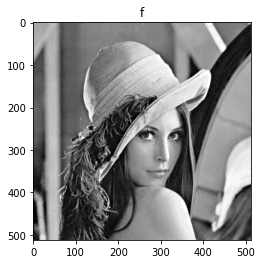

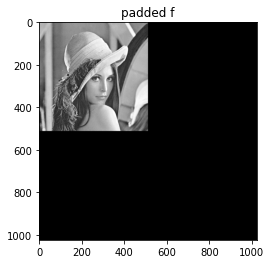

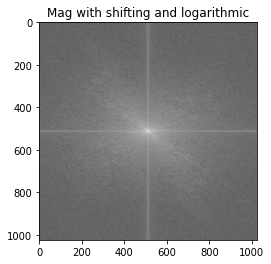

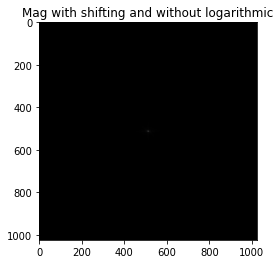

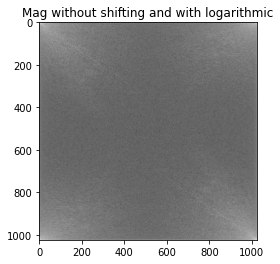

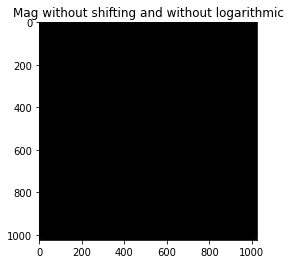

In [ ]:
F_lena = DFT_result(lena)

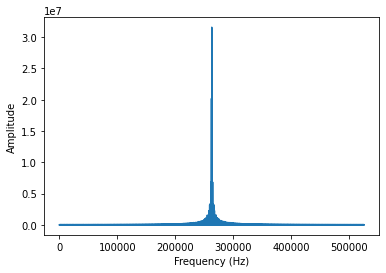

In [ ]:
s_magnitude = np.abs(F_lena).flatten()
frequency = np.linspace(0, np.argmax(F_lena), len(s_magnitude))
frequency_bins = int(len(s_magnitude))
plt.plot(frequency[:frequency_bins], s_magnitude[:frequency_bins] )
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()  

###Barbara

In [ ]:
barbara = cv2.imread('/content/sample_data/Barbara.bmp', cv2.IMREAD_GRAYSCALE)

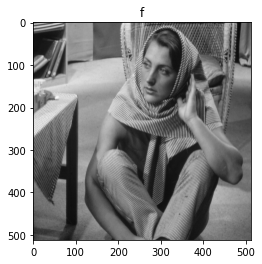

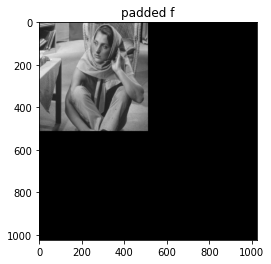

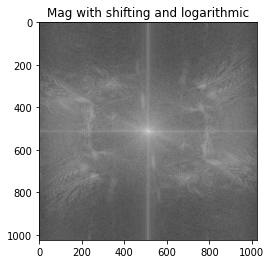

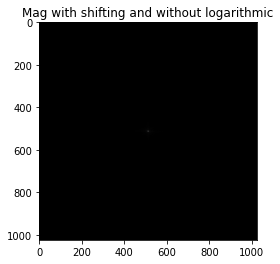

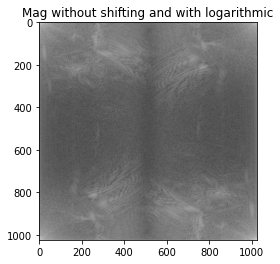

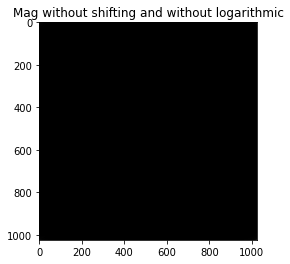

In [ ]:
F_barb = DFT_result(barbara)

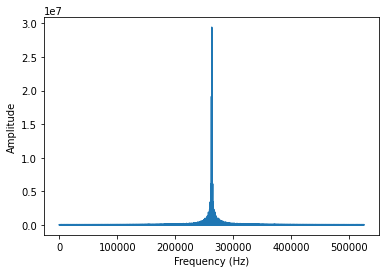

In [ ]:
s_magnitude = np.abs(F_barb).flatten()
frequency = np.linspace(0, np.argmax(F_barb), len(s_magnitude))
frequency_bins = int(len(s_magnitude))
plt.plot(frequency[:frequency_bins], s_magnitude[:frequency_bins] )
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

###Baboon

In [ ]:
baboon = cv2.imread('/content/sample_data/Baboon.bmp', cv2.IMREAD_GRAYSCALE)

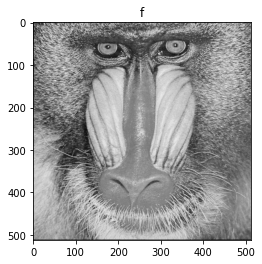

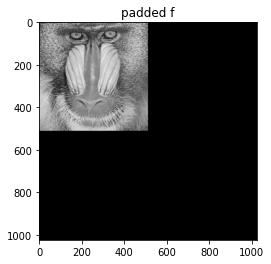

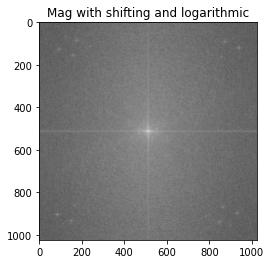

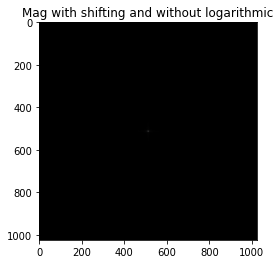

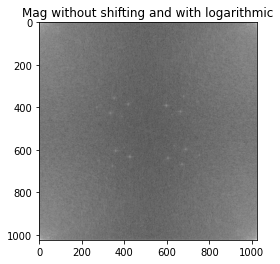

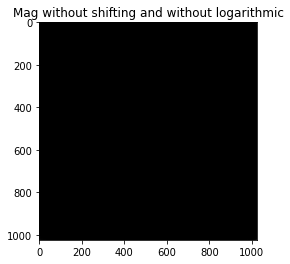

In [ ]:
F_bab = DFT_result(baboon)

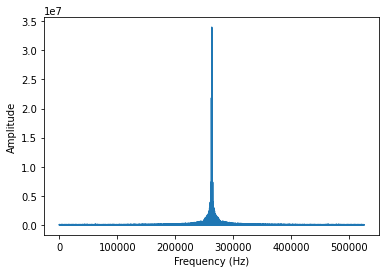

In [ ]:
s_magnitude = np.abs(F_bab).flatten()
frequency = np.linspace(0, np.argmax(F_bab), len(s_magnitude))
frequency_bins = int(len(s_magnitude))
plt.plot(frequency[:frequency_bins], s_magnitude[:frequency_bins] )
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

###F16

In [ ]:
F16 = cv2.imread('/content/sample_data/F16.bmp', cv2.IMREAD_GRAYSCALE)

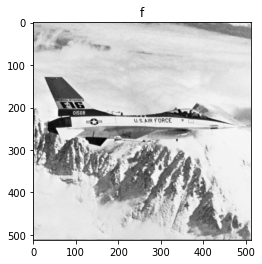

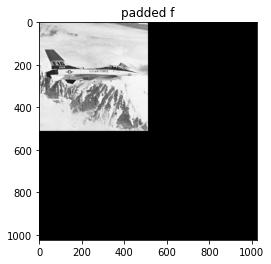

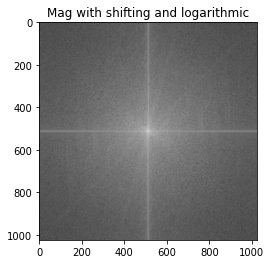

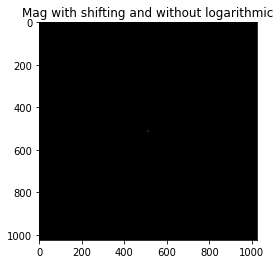

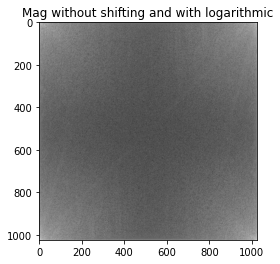

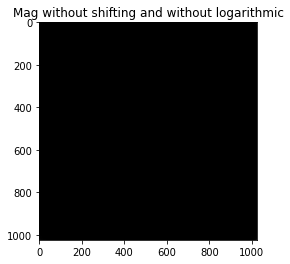

In [ ]:
F_f16 = DFT_result(F16)

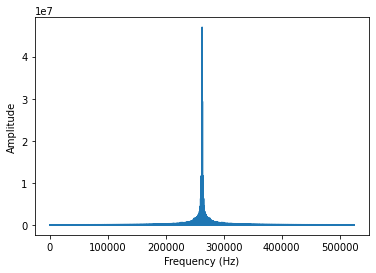

In [ ]:
s_magnitude = np.abs(F_f16).flatten()
frequency = np.linspace(0, np.argmax(F_f16), len(s_magnitude))
frequency_bins = int(len(s_magnitude))
plt.plot(frequency[:frequency_bins], s_magnitude[:frequency_bins] )
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

# 4.2 Filtering


## 4.2.1

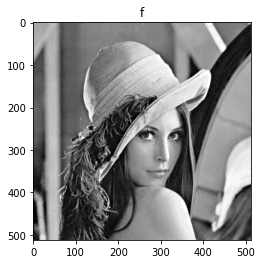

In [ ]:
f=lena

In [ ]:
F = np.fft.fftshift(np.fft.fft2(f))
F.shape

(512, 512)

In [ ]:
g = np.fft.ifft2(np.fft.ifftshift(F))
g.shape

(512, 512)

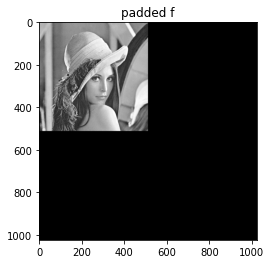

In [ ]:
m,n = f.shape
p=2*m
q=2*n

fp = pad(f,p,q)
plt.imshow(fp, "gray"), plt.title("padded f")
plt.show()  

In [ ]:
Fp = np.fft.fftshift(np.fft.fft2(fp))
gp = np.fft.ifft2(np.fft.ifftshift(Fp))
gp.shape

(1024, 1024)

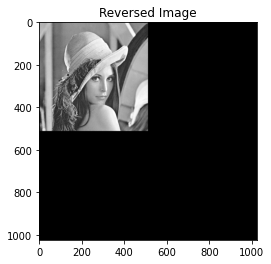

In [ ]:
plt.imshow(np.abs(gp), "gray"), plt.title("Reversed Image") 
plt.show()

##4.2.2


In [ ]:
barbara = cv2.imread('/content/sample_data/Barbara.bmp', cv2.IMREAD_GRAYSCALE)

In [ ]:
m,n = barbara.shape
fft = np.fft.fft2(barbara)

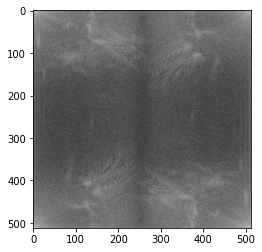

In [ ]:
plt.imshow(np.log(1+np.abs(fft)),'gray')

### filter a

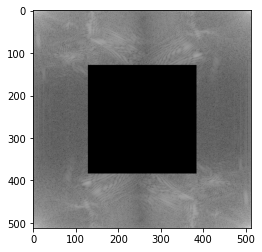

In [ ]:
t=1/4

ffta1 = fft
for k in range(m):
    for l in range(n):
      if ((t*n) < k and (t*n) < l and k < ((1-t)*n) and l < ((1-t)*n)):
        ffta1[k, l] = 0

plt.imshow(np.log(1+np.abs(ffta1)),'gray')
plt.show()

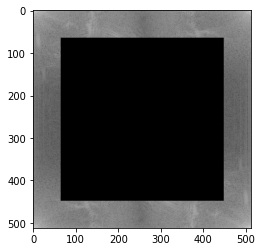

In [ ]:
t=1/8

ffta2 = fft
for k in range(m):
    for l in range(n):
      if ((t*n) < k and (t*n) < l and k < ((1-t)*n) and l < ((1-t)*n)):
        ffta2[k, l] = 0

plt.imshow(np.log(1+np.abs(ffta2)),'gray')
plt.show()

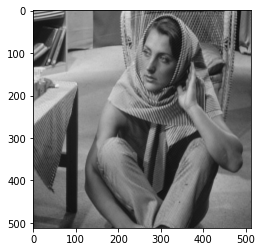

In [ ]:
ga1 = np.abs(np.fft.ifft2(ffta1))
plt.imshow((ga1),'gray')
plt.show()

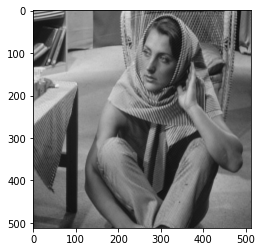

In [ ]:
ga2 = np.abs(np.fft.ifft2(ffta2))
plt.imshow((ga2),'gray')
plt.show()

### filter b

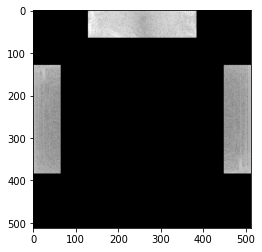

In [ ]:
t=1/4

fftb1 = fft
for k in range(m):
    for l in range(n):
      if (0 <= k and 0 <= l and k <= (t*m) and l <= (t*n)):
        fftb1[k, l] = 0
      elif (0 <= k and k <= (t*m) and ((1 -t)*n) <= l and l <= (n-1)):
        fftb1[k, l] = 0
      elif (((1 -t)*m) <= k and k <= (m-1) and 0 <= l and l <= (t*n)):
        fftb1[k, l] = 0
      elif (((1 -t)*m) <= k and l <= (n-1)):
        fftb1[k, l] = 0

plt.imshow(np.log(1+np.abs(fftb1)),'gray')
plt.show()

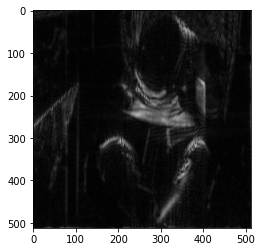

In [ ]:
gb1 = np.abs(np.fft.ifft2(fftb1))
plt.imshow((gb1),'gray')
plt.show()

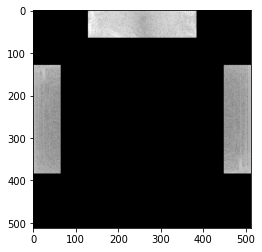

In [ ]:
t=1/8

fftb2 = fft
for k in range(m):
    for l in range(n):
      if (0 <= k and 0 <= l and k <= (t*m) and l <= (t*n)):
        fftb2[k, l] = 0
      elif (0 <= k and k <= (t*m) and ((1 -t)*n) <= l and l <= (n-1)):
        fftb2[k, l] = 0
      elif (((1 -t)*m) <= k and k <= (m-1) and 0 <= l and l <= (t*n)):
        fftb2[k, l] = 0
      elif (((1 -t)*m) <= k and l <= (n-1)):
        fftb2[k, l] = 0

plt.imshow(np.log(1+np.abs(fftb2)),'gray')

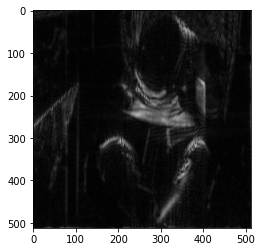

In [ ]:
gb2 = np.abs(np.fft.ifft2(fftb2))
plt.imshow((gb\2),'gray')
plt.show()